In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [14]:
#Global constants
g = 32.17 #ft/s^2

## Part A: 

In [15]:
#find all u,d,theta step values
u_vals = np.arange(50,150+1,5)
d_vals = np.arange(25,50+1,2.5)
theta_vals = np.arange(15,85+1,5)

#set default (assumed) variable values
u_default = 125
d_default = 40
theta_default = 35

In [16]:
def field_goal(speed,theta,dist):
    #convert to Empirical units:
    theta = theta * (np.pi)/180 #degrees to radians
    dist = dist*3 #yards to ft
    
    # r(t,speed,theta) = (speed*cos(theta)*t)x^ + (speed*sin(theta)*t - 1/2*g*t^2)y^
    t_goal = dist/(speed*np.cos(theta))
    y_goal = (speed*np.sin(theta)*t_goal)-(0.5*g*np.square(t_goal))
    
    #check if height at goal is larger than 10 feet
    if(y_goal>10):
        #print("Your field goal was successfull with a final height of " + str(round(y_goal,3)) + " feet")
        return "g" 
    else:
        #print("Your field goal was not successfull with a final height of " + str(round(y_goal,3)) + " feet")
        return "r"

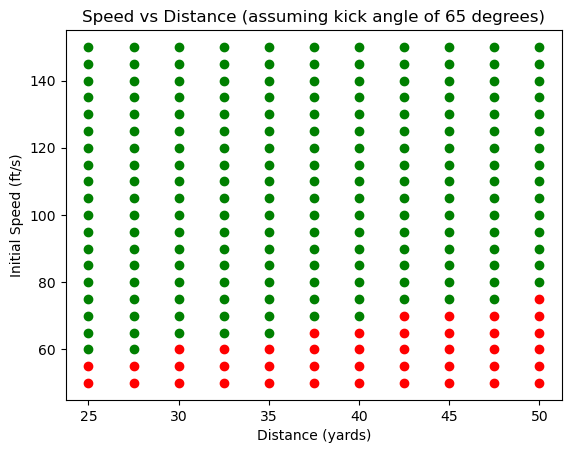

In [17]:
# u vs d graph
# Assume theta to be 65 degrees
for d in d_vals:
    for u in u_vals:
        plt.scatter(d, u, c=field_goal(u, theta_default, d))
        
plt.title("Speed vs Distance (assuming kick angle of 65 degrees)")
plt.xlabel("Distance (yards)")
plt.ylabel("Initial Speed (ft/s)")
plt.show()

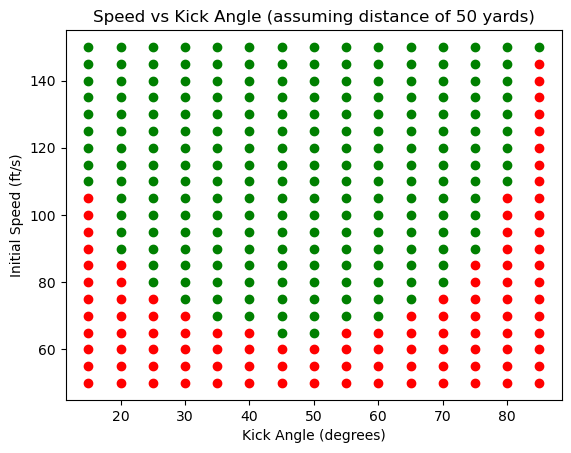

In [18]:
# u vs theta graph
#Assume d to be 40 yards

for theta in theta_vals:
    for u in u_vals:
        scatter = plt.scatter(theta, u, c=field_goal(u, theta, d_default))
        
plt.title("Speed vs Kick Angle (assuming distance of 50 yards)")
plt.xlabel("Kick Angle (degrees)")
plt.ylabel("Initial Speed (ft/s)")
plt.show()

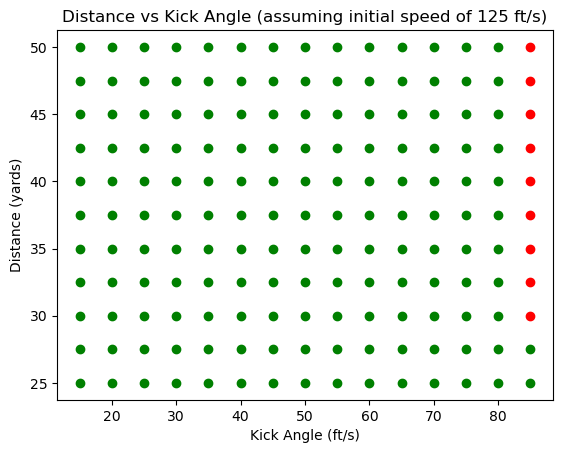

In [19]:
# d vs theta graph
# Assume u to be 125 ft/s

for theta in theta_vals:
    for d in d_vals:
        plt.scatter(theta, d, c=field_goal(u_default, theta, d))
        
plt.title("Distance vs Kick Angle (assuming initial speed of 125 ft/s)")
plt.xlabel("Kick Angle (ft/s)")
plt.ylabel("Distance (yards)")
plt.show()

# In Conclusion:
For the most part, all of the field goals were successfull, regardless of initial speed, kick angle, or distance from the goalpost. The only exeption to this was when our speed was at a minimum (50 ft/s), our angle at a maximum (85 degrees), and our distance was 45 or 50 yards. In these cases, the field goal failed.

## Part B:

In [20]:
#function to find solutions of
def f(x):
    return (x*np.log(x))-4

In [21]:
#find the average between 2 numbers (halfway point between them)
def average(low,high):
    return (low+high)/2

In [22]:
#find difference between 2 numbers
def diff(low,high):
    return high-low

In [23]:
#recursive function that approximates the solution to a given function
#Inputs:
#   eq = function to find solution of
#   xlow = lower (negative) x-value guess
#   xhigh = higher (positive) x-value guess
#   precision = highest order of allowable error (eg. 0.1, 0.01, 0.001, etc.)
#   iterations (optional) = number of recursions the function has looped through = automatically set to 0

#Output:
#   [xfinal,iterations] = list of the final approximated solution and the number of recursions the function has gone through

def bisection(eq, xlow, xhigh, precision, iterations=0):
    #calculate the midpoint between the 2 x-value guesses
    xnew = average(xlow,xhigh)

    #base case:
    #if the difference between guesses is smaller than the allowable error, return the midpoint as an approximate solution
    if(diff(xlow,xhigh)<=precision):
        #round answer to same number of decimal points as allowable error (sig figs)
        xfinal = round(xnew, int(-1*np.log10(precision))) 
        return [xfinal,iterations]
    
    #if the midpoint is negative, re-call function with midpoint as lower x-value guess
    elif(eq(xnew)<0):
        #increase number of iterations as the function calls itself
        return bisection(eq,xnew,xhigh,precision,iterations+1)
    
    #if the midpoint is positive, re-call the function with midpoint as higher x-value guess
    else:
        #increase number of iterations as the function calls itself
        return bisection(eq,xlow,xnew,precision,iterations+1)


In [24]:
#print out approximation and number of required iterations for function f(x) and initial x-value guesses 1 and 6
print("Solution and number of iterations reqired to find it")
print(bisection(f,1,6,0.01))
print(bisection(f,1,6,0.001))
print(bisection(f,1,6,0.0001))


Solution and number of iterations reqired to find it
[3.33, 9]
[3.328, 13]
[3.3273, 16]
